In [35]:
import pandas as pd
import numpy as np
from scikit_alarm_framework.alarm_generator import set_point
from graphviz import Digraph

In [2]:
from matplotlib import pyplot as plt
import TransEntropy_mod as te

GitHub user········
GitHub password········
^C
Operation cancelled by user
^C


/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


In [4]:
#-----------geracao dos alarmes para novo dataset----

#data processo
dist6_novo_proc = pd.read_csv("resultados_defesa/dist6_1_10.csv", index_col='TOUT',usecols= ['TOUT']+['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]])


thresh_high = [0.284,3711.109,4514.069,48.235,2803.033,66.505,122.932,102.527]
thresh_low =  [0.249,3597.394,4371.271,46.954,2796.971,63.494,122.867,102.409]


#--------------geracao dos alarmes------------
high_alarms = set_point.generate(dist6_novo_proc, thresh_high)
low_alarms = set_point.generate(dist6_novo_proc, thresh_low, high=False)

#------------------renomenado as colunas-------------

high_names = ['x%01d_high' % var for var in [1,2,3,6,7,8,9,21]]
low_names =  ['x%01d_low'  % var for var in [1,2,3,6,7,8,9,21]]

rename_high = {key:value for key, value in zip(high_alarms.columns,high_names)}
rename_low = {key:value for key, value in zip(low_alarms.columns,low_names)}

high_alarms = high_alarms.rename(rename_high, axis='columns')
low_alarms = low_alarms.rename(rename_low, axis='columns')

#----------------------contenando os dois tipos de alrme---------------

dist6_novo_alm =  pd.concat([high_alarms, low_alarms], axis=1)
dist6_novo_alm.to_csv('resultados_defesa/dist6_novo_alm.csv')

In [7]:

dist6_novo_alm.index= pd.to_datetime(dist6_novo_alm.index, unit='min')


In [8]:
dist6_novo_alm_5 = te.apply_roll_mean(dist6_novo_alm,5)

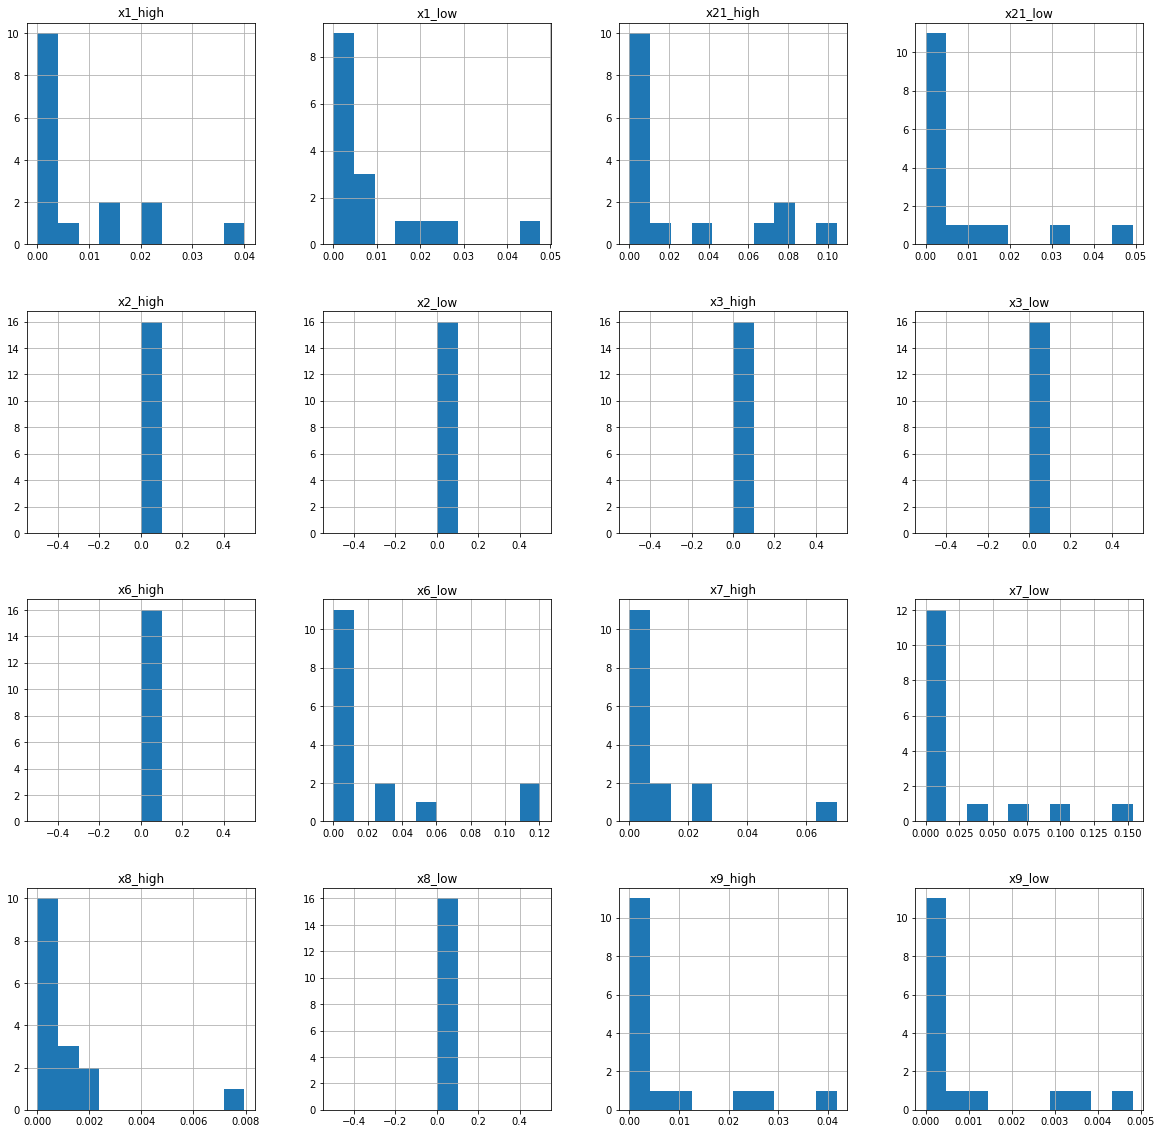

In [9]:
df_te_11_50 = pd.read_csv("resultados_defesa/df_te_novo50_k1l1.csv", index_col=0)
(df_te_11_50.transpose()).hist(figsize=(20,20))
plt.show()

In [10]:
df_te_11_50 = pd.read_csv("resultados_defesa/df_te_novo50_k1l1.csv",index_col=0)
df_te_lag_11_50 = pd.read_csv("resultados_defesa/df_lags_novo50_k1l1.csv", index_col=0)
h = np.histogram(df_te_11_50.values)
h

(array([227,  11,   5,   3,   5,   0,   2,   2,   0,   1]),
 array([0.        , 0.01537401, 0.03074801, 0.04612202, 0.06149603,
        0.07687004, 0.09224404, 0.10761805, 0.12299206, 0.13836606,
        0.15374007]))

In [11]:
te_full = df_te_11_50.values.reshape(256)
te_non_zero = a[a>0]
plt.hist(te_non_zero, bins=100)


NameError: name 'a' is not defined

In [12]:
q3 = np.percentile(te_non_zero, 75)
q1 = np.percentile(te_non_zero, 25)
q3 + 1.5*(q3-q1)


NameError: name 'te_non_zero' is not defined

In [37]:
q3

0.0015878401774887714

In [13]:
values = df_te_11_50.values
t = np.mean(values) + 3*np.std(values)
t

0.06907470805493252

In [14]:
q3 = np.percentile(df_te_11_50.values, 75)
q1 = np.percentile(df_te_11_50.values, 25)
t = q3 + 1.5*(q3-q1)
t

0.003969600443721928

In [26]:
np.histogram(values, bins=20)

(array([213,  14,   6,   5,   3,   2,   3,   0,   2,   3,   0,   0,   0,
          2,   0,   2,   0,   0,   0,   1]),
 array([0.        , 0.007687  , 0.01537401, 0.02306101, 0.03074801,
        0.03843502, 0.04612202, 0.05380902, 0.06149603, 0.06918303,
        0.07687004, 0.08455704, 0.09224404, 0.09993105, 0.10761805,
        0.11530505, 0.12299206, 0.13067906, 0.13836606, 0.14605307,
        0.15374007]))

In [16]:
q3

0.0015878401774887714

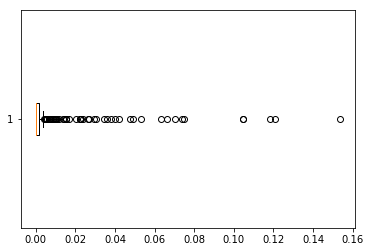

In [17]:
plt.boxplot(df_te_11_50.values.reshape(256),vert=False)
plt.show()

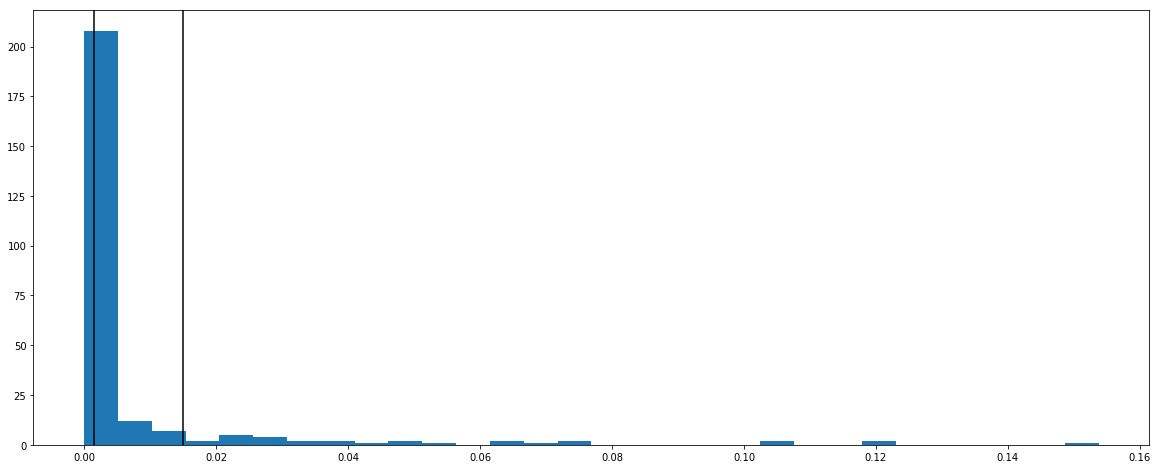

In [22]:

# plt.boxplot(df_te_11_50.values.reshape(256),vert=False)
# plt.show()
plt.figure(figsize=(20,8))
plt.hist(df_te_11_50.values.reshape(256), bins=30)
plt.axvline(0.0015,color='black')
plt.axvline(0.015,color='black')


plt.show()

In [19]:
result = te.apply_methodlogy(df_te_11_50, df_te_lag_11_50,dist6_novo_alm_5, 0.007687,0.5)

/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


here  x6_low x1_high
here  x9_high x7_high
here  x6_low x8_high
here  x6_low x9_high
here  x1_low x21_high
here  x21_high x6_low
here  x21_high x7_low
here  x9_high x21_low


In [20]:
result_quartil = te.apply_methodlogy(df_te_11_50, df_te_lag_11_50,dist6_novo_alm_5, t,1)

/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


here  x9_low x1_high
here  x9_low x1_high
here  x9_low x7_high
here  x9_low x7_high
here  x9_low x8_high
here  x9_low x8_high
here  x9_low x8_high
here  x9_low x9_high
here  x9_low x9_high
here  x1_low x21_high
here  x9_low x6_low
here  x9_low x7_low
here  x9_low x21_low
here  x9_low x21_low
here  x9_low x21_low


/home/rute/git/pesquisa/TransEntropy_mod.py:457: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not lista[node] or np.all(np.unique(lista[node]) == ['x']):


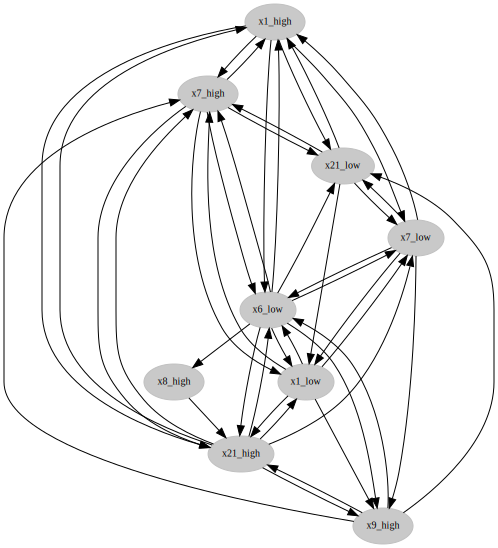

In [38]:
te_acy = te.generate_aciclic_graph(te.generate_df_valid_corrs(df_te_11_50,0.007687).values)
df_acy = pd.DataFrame(data=te_acy, columns=df_te_11_50.columns, index=df_te_11_50.columns)
graph_simple(te.generate_df_valid_corrs(df_te_11_50,0.007687))

In [33]:
def graph_simple(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    in_graph = []
    for k, row in enumerate(df.index):
        if any(df.loc[row]):
            g.node(str(row),row, shape='oval', fontsize='10', width='0', style='filled', fillcolor='#c9c9c9', color="gray")
            in_graph.append(row)

              
    for c, col in enumerate(df.columns):
        if any(df[col]):
            if col not in in_graph:
                g.node(str(col), col, shape='oval', fontsize='10', width='0', style='filled', fillcolor='#c9c9c9', color="gray") 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df.index):
            if(df[col][i]):
                g.edge(str(row), str(col), label=str(""), style= edge_style, color='black')  
    return g 

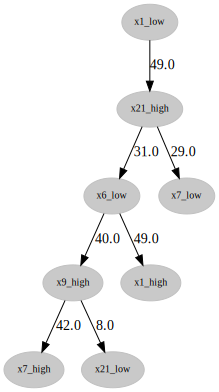

In [19]:
te.graph_simple(result)

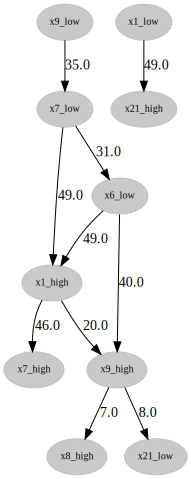

In [17]:
te.graph_simple(result_quartil)


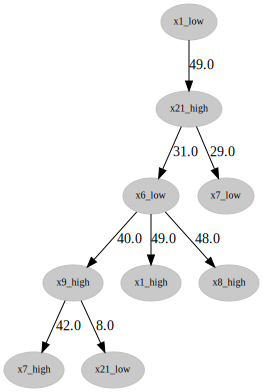

In [20]:
te.graph_simple(result)